In [1]:
import numpy as np
import nnfs
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

nnfs.init()

In [50]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        #weights shape = (n_inputs, n_neurons)
        self.weights = .01*np.random.rand(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    def forward(self, input):
        #input shape = (1, len(input))
        self.output = np.dot(input, self.weights) + self.biases

class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        
class Activation_Softmax:
    def forward(self,arr):
    # subtracting max num from the arr, this does not effect the end result
    # row wise only, while maintaining original demensions
        exp_vals = np.exp(arr - np.max(arr, axis=1, keepdims=1))
        probabilities = exp_vals / np.sum(exp_vals, axis=1, keepdims=1)
        self.output = probabilities
        


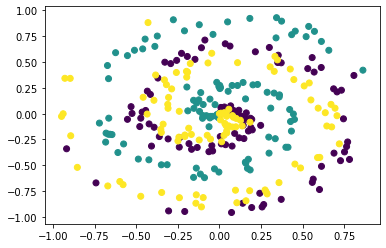

In [56]:
X, y = spiral_data(samples=100, classes = 3)
plt.scatter(X[:,0], X[:,1], c=y)

In [55]:



#create a layer with 2 input features and 3 neutrons
#input shape (300,2)
#layer shape (2,3)
#(300,2) *(2,3) = (300, 3)
layer1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()
layer2 = Layer_Dense(3,3)
activation2 = Activation_Softmax()

layer1.forward(X)
activation1.forward(layer1.output)
layer2.forward(activation1.output)
activation2.forward(layer2.output)


#activation2.output[:3] debug

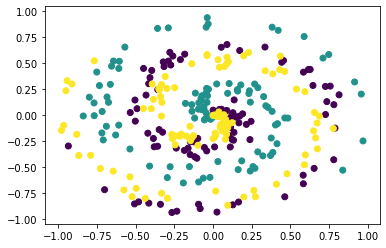